In [1]:
import os
import sys
import blib
import glob
import numpy as np

srcDir = os.path.abspath("../src")
if os.path.exists(srcDir):
    print("Using development src dir", srcDir)
    sys.path.insert(0, srcDir)

import radar
import radar.chart

blib.useTheme("dark")

Using development src dir /Users/boonleng/Developer/radar-data/src


In [2]:
files = sorted(glob.glob(os.path.expanduser("~/Downloads/data/read-test/PX-202405*.xz")))
# files = sorted(glob.glob(os.path.expanduser("~/Downloads/data/*-E6.0.txz")))
assert len(files) > 0, "No files found"
file = files[min(len(files) - 1, 7)]
print(f"Selected file {file} ({len(files)} files)")

Selected file /Users/boonleng/Downloads/data/read-test/PX-20240529-150246-E4.0.tar.xz (1 files)


In [3]:
sweep = radar.read(file, verbose=2)
if sweep["longitude"] is None or sweep["latitude"] is None:
    sweep["longitude"] = -97.46381
    sweep["latitude"] = 35.23682

In [ ]:
tarinfo = radar.read_tarinfo(file)
symbols = ["Z", "V", "W", "D", "R", "P"]
available_symbols = [s for s in symbols if s in tarinfo]

In [10]:
available_symbols

['R', 'W', 'P', 'V', 'Z', 'D']

In [5]:
sweep["products"]

{'R': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],
       shape=(360, 1330), dtype=float32),
 'W': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],
       shape=(360, 1330), dtype=float32),
 'P': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],
       shape=(360, 1330), dtype=float32),
 'V': a

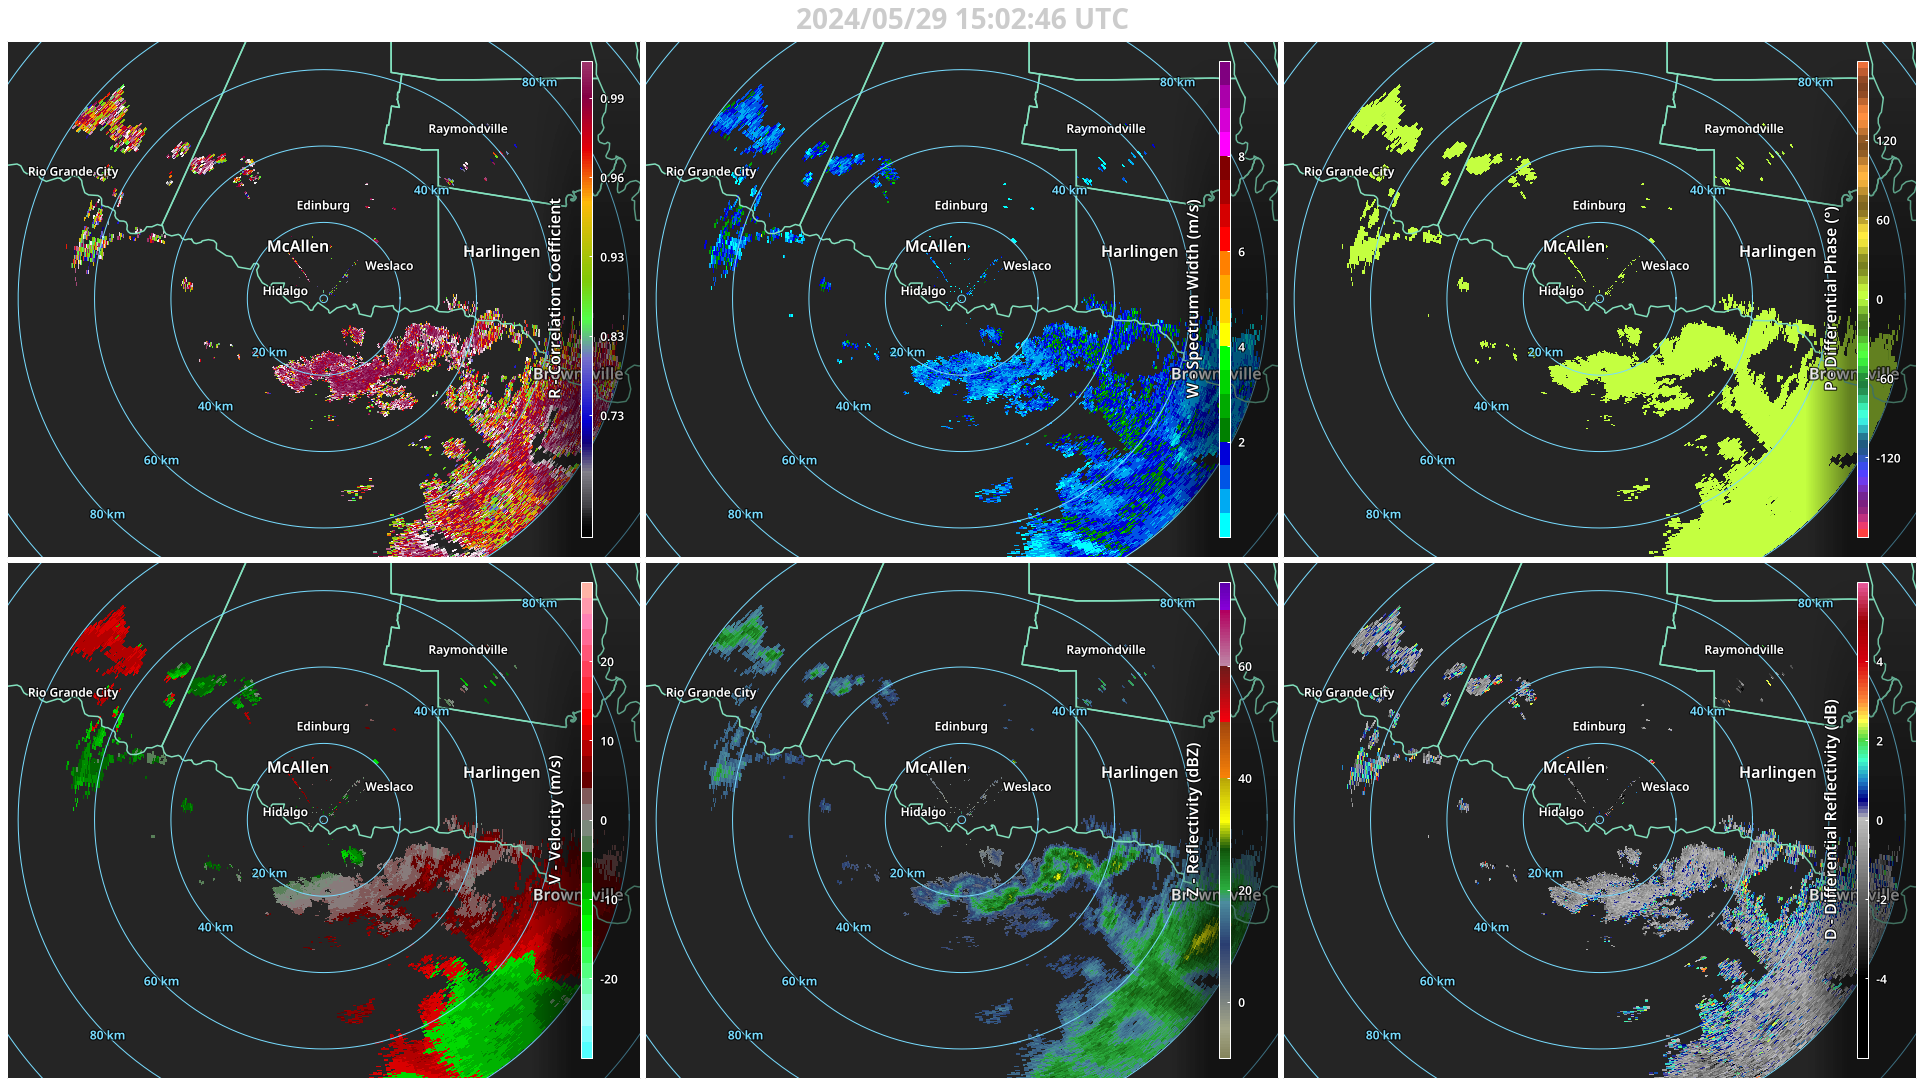

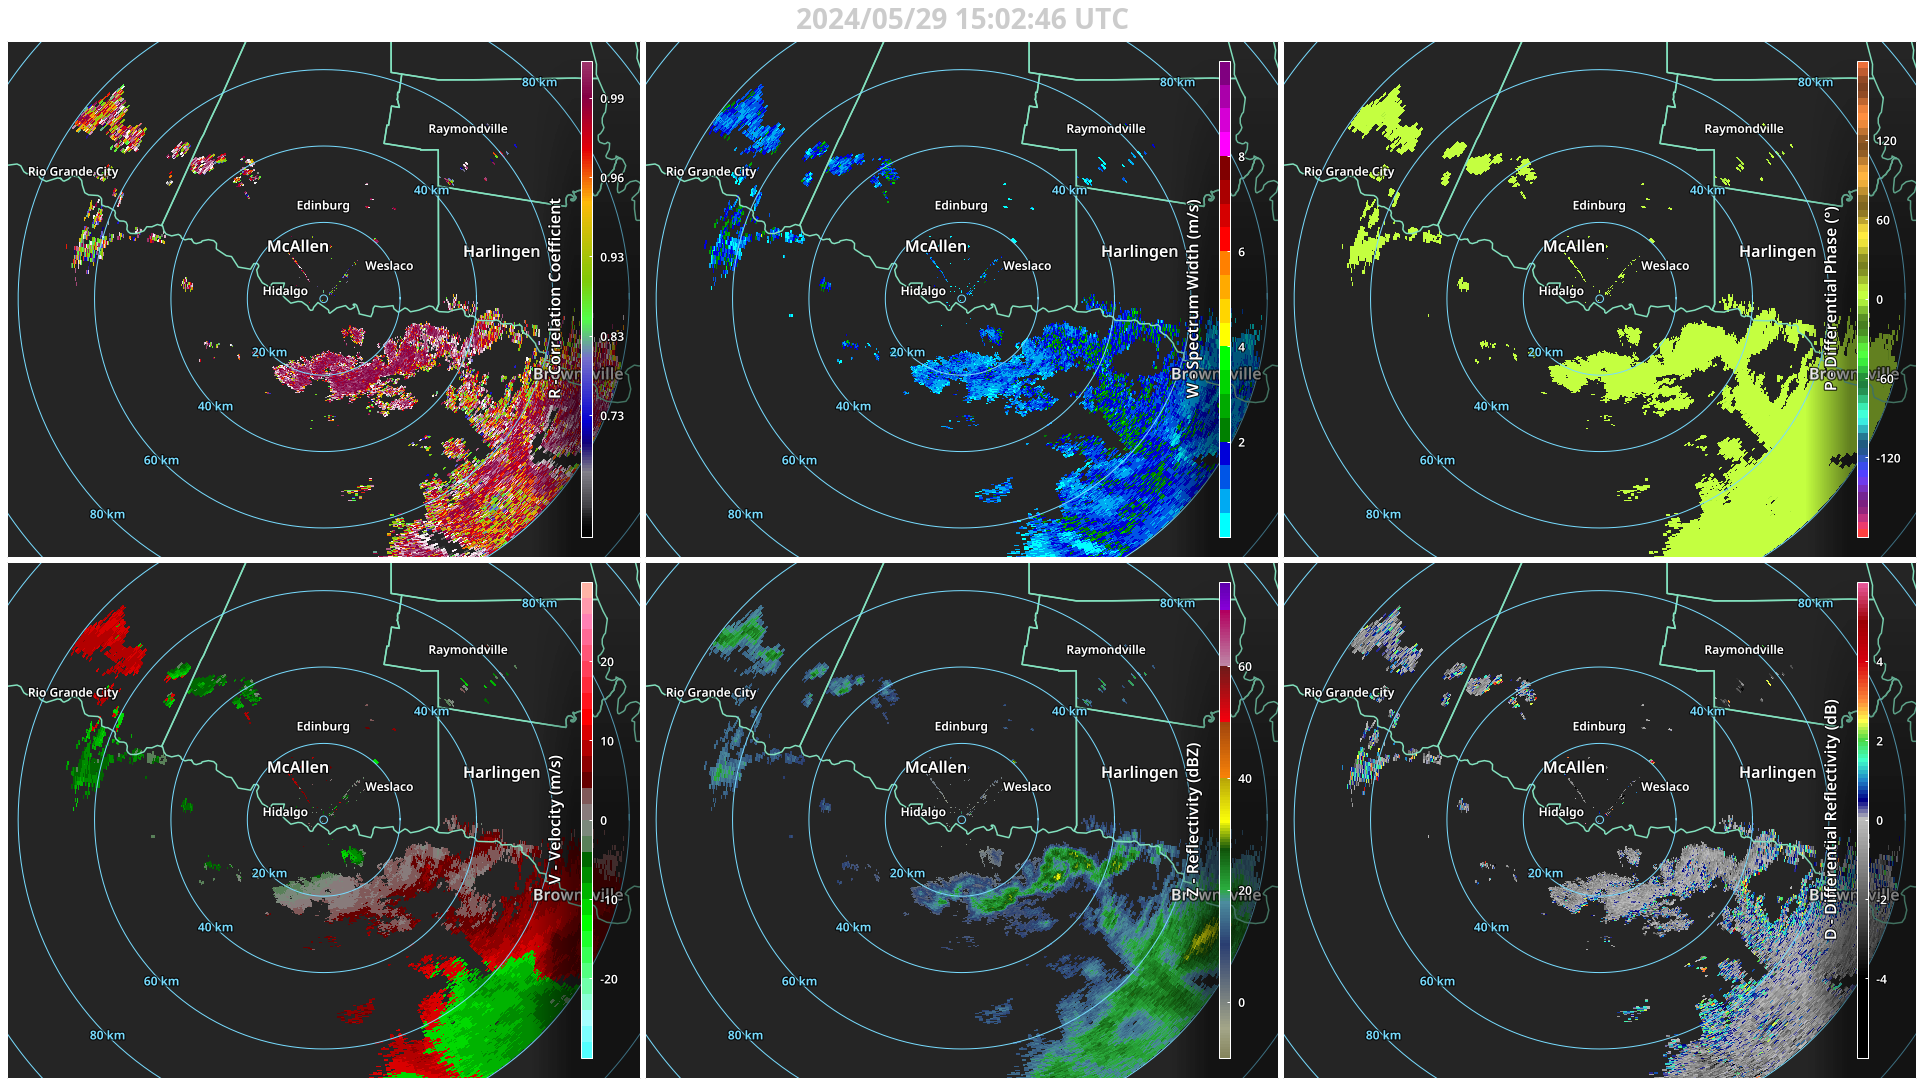

In [6]:
# chart = radar.chart.ChartPPI(sweep, rmax=100, s=1)
chart = radar.chart.ChartPPI(sweep)
chart.fig

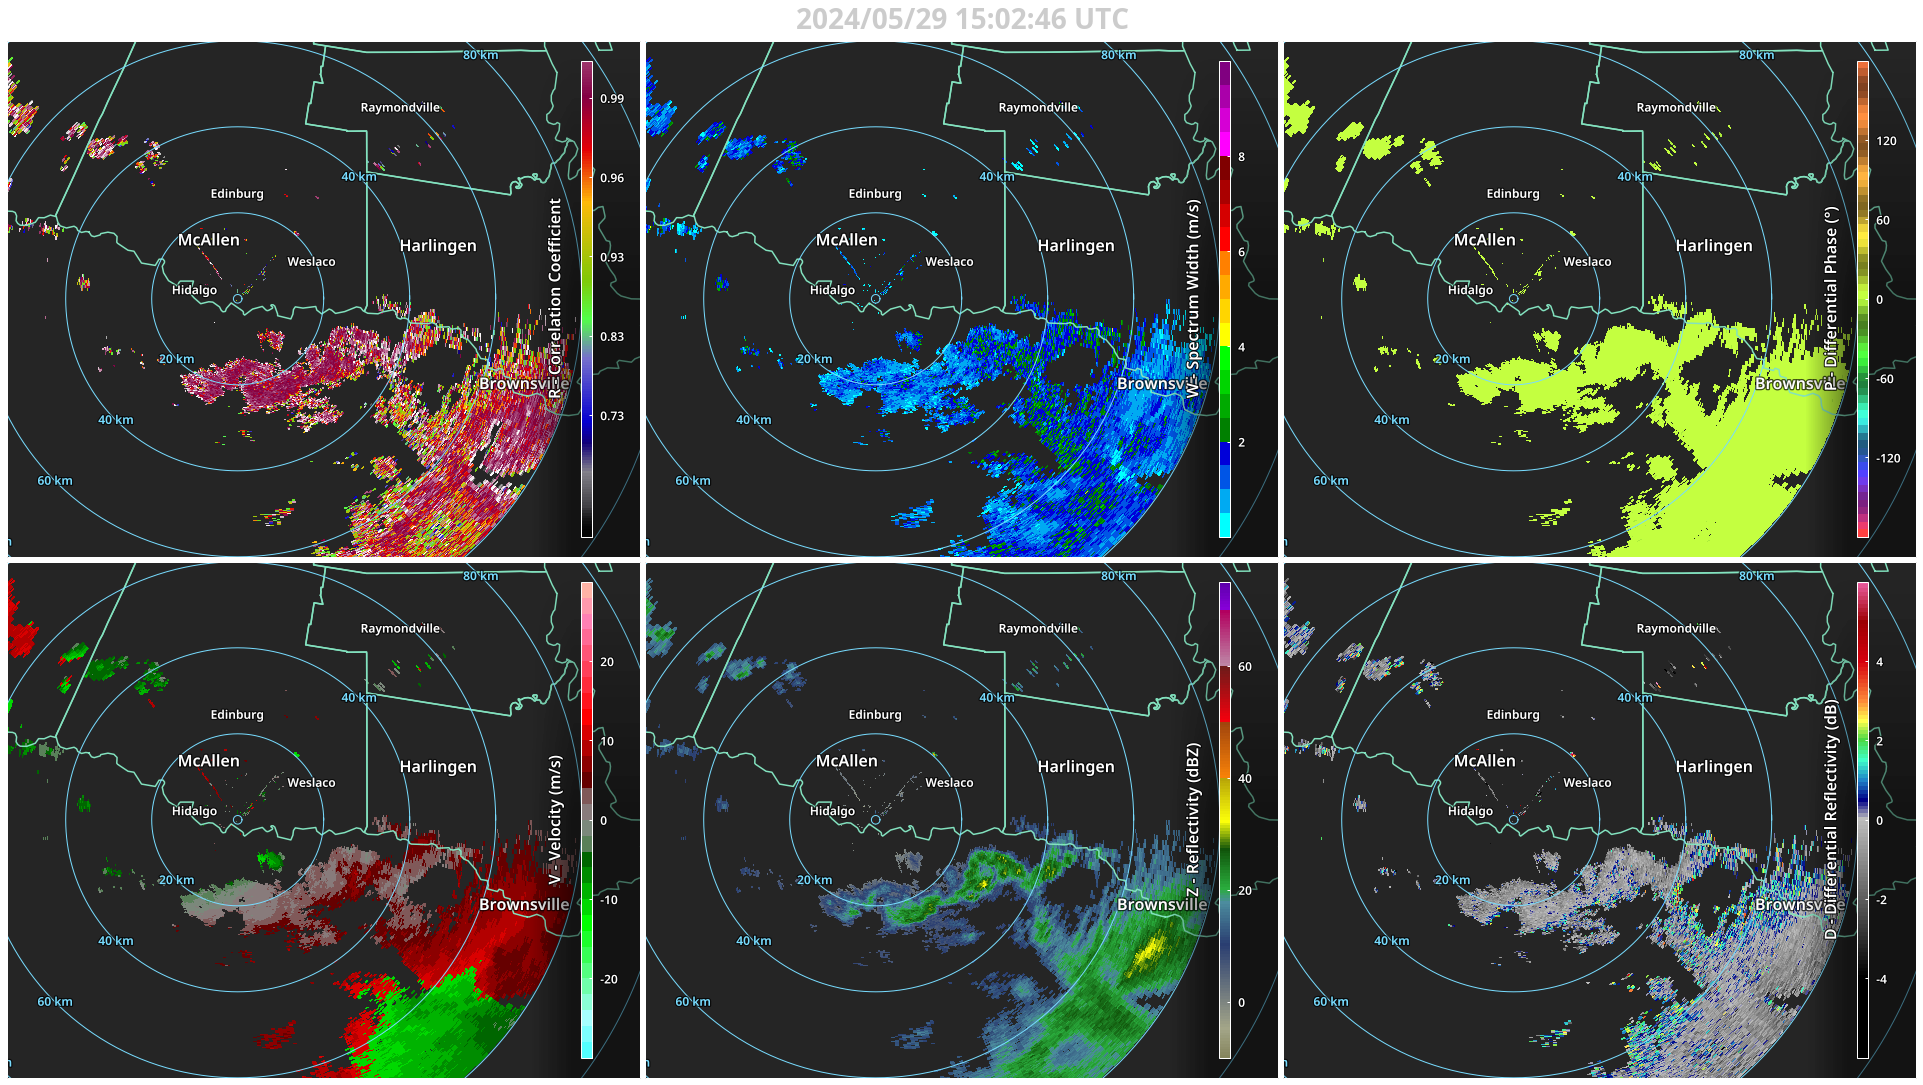

In [7]:
chart.set_data(sweep, rmax=60, xoff=-20)
chart.fig

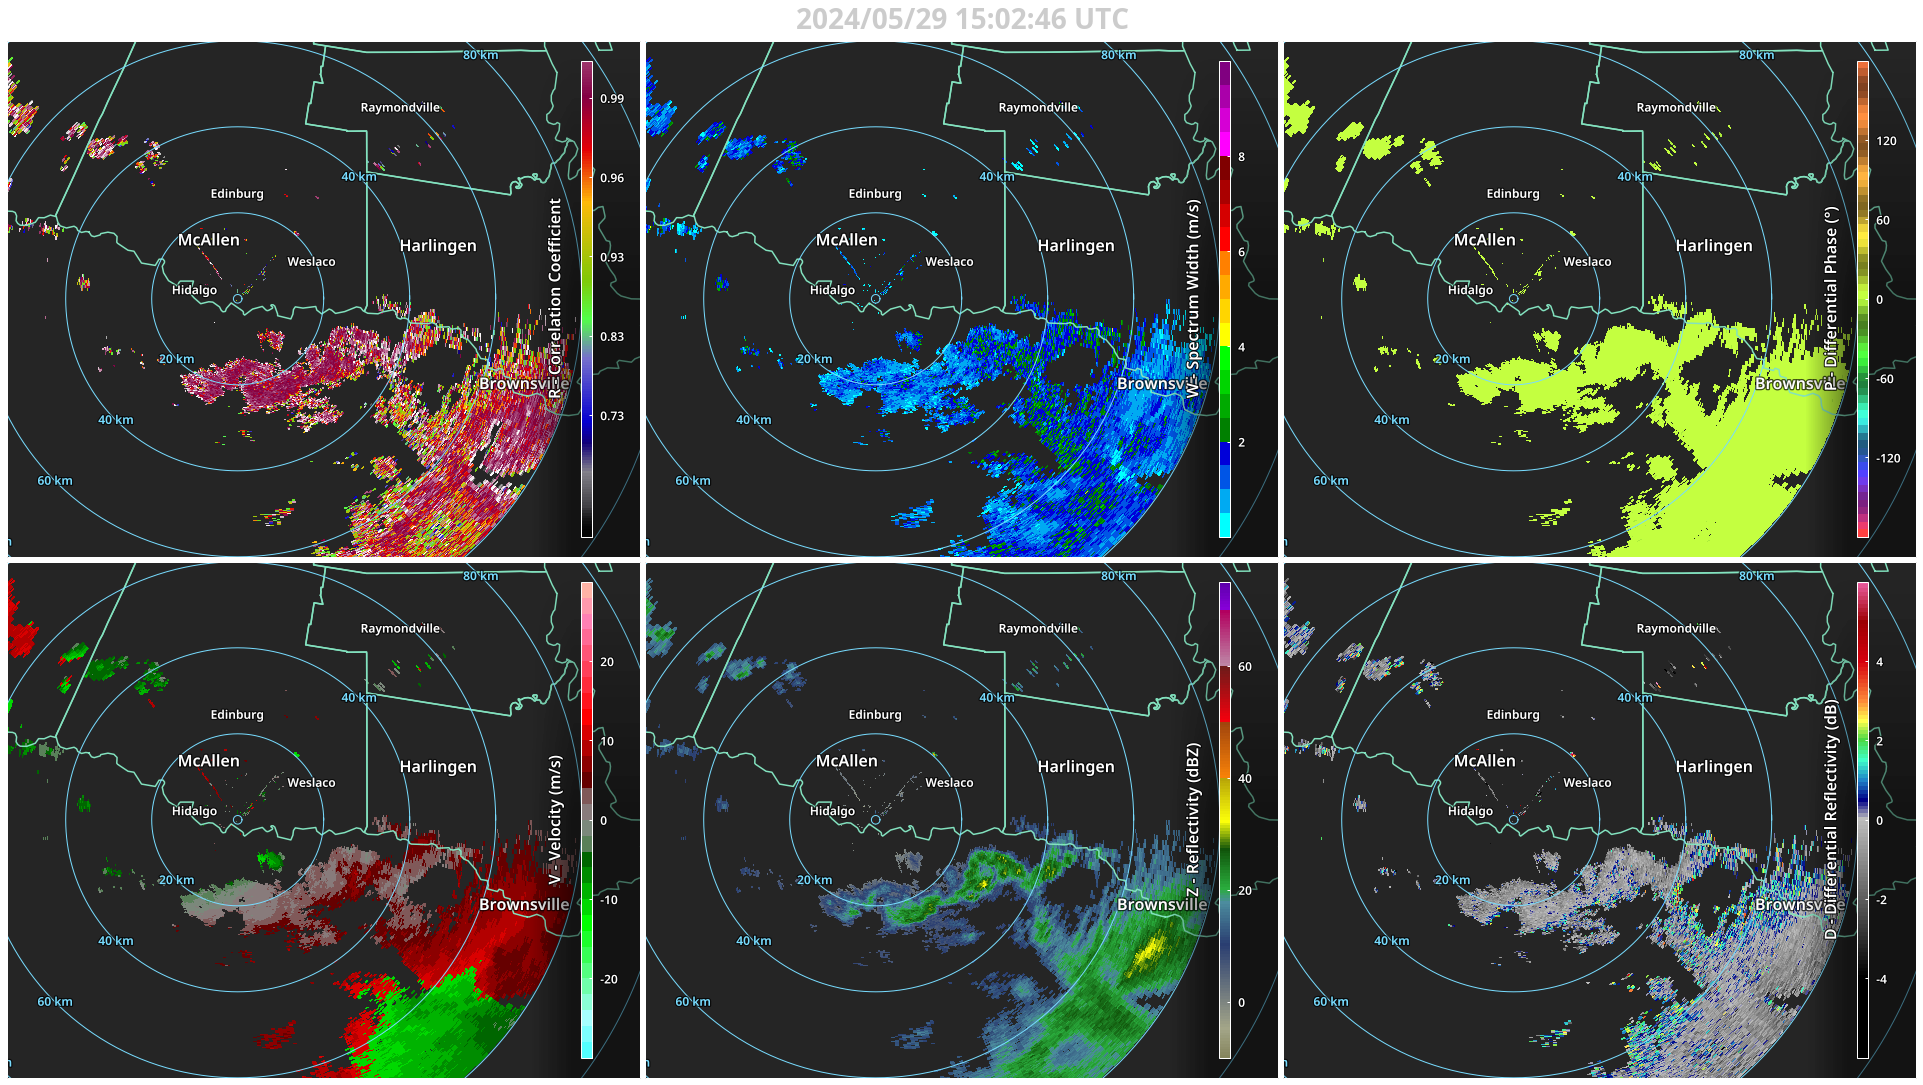

In [8]:
chart.set_data(sweep)
chart.fig